In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
plt.style.use("ggplot")

import nltk

In [29]:
df = pd.read_csv(r"C:\Users\GAMES\Downloads\HIRSHI\sentimental analysis\Reviews.csv")

In [30]:
df = df.dropna()

In [31]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [32]:
np.random.seed(34)
df1 = df.sample(frac = 0.1)

In [33]:
df1

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
302888,302889,B004BY7HKC,A2CQIWHK4CKTGZ,C. Stowe,0,0,5,1328400000,Great gluten free snack,Out of all of the gluten free snacks I have tr...
38510,38511,B000H26J7E,A36WA7L88C2NW1,"Candace Drimmer ""a.k.a. Candi Boggs""",2,6,5,1297728000,"Affordable, delightful and good value for the ...",As a chocolate lover--who use to make pilgrima...
29130,29131,B000FFVYFA,A2G6O9IQ6Y64AD,Just me,5,5,5,1236902400,Small slice of heaven,Wow.<br />For those on a gluten & dairy-free d...
110703,110704,B00438XVGU,A10FHIE6EYFOUG,"J. C. Hirsch ""nerd pie""",4,5,3,1309824000,Expiration dates - sometimes chewing gum stick...,I have some experience with expired Via coffee...
64330,64331,B001EO5YAC,A19JPROF2J4PA4,Acheron's Flow,0,0,5,1265500800,My favorite online coffee,Very nice roast. An aroma to die for. This is ...
...,...,...,...,...,...,...,...,...,...,...
22858,22859,B000RZAJL8,A202YIJBLXHWDC,Craig S,0,0,1,1338422400,Old,Delivery was on time but when I opened the pro...
125239,125240,B00092LSWS,A1EABBQ0FG1APR,Elizabeth Twiddy,1,1,5,1199664000,sugar cubes -- great sugar + value,great product. high quality and lower price t...
363907,363908,B002CY7TJW,A2158Y2U61AU9G,Lillian37,5,9,2,1297728000,Weak Vanilla Flavor,After researching brands of vanilla bean paste...
303801,303802,B000EUIZBM,A16KTJ4425JFAR,"saucy nomad ""literary minx""",0,0,5,1298246400,Love it!,This is my second time purchasing the 120 bags...


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56840 entries, 302888 to 409458
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      56840 non-null  int64 
 1   ProductId               56840 non-null  object
 2   UserId                  56840 non-null  object
 3   ProfileName             56840 non-null  object
 4   HelpfulnessNumerator    56840 non-null  int64 
 5   HelpfulnessDenominator  56840 non-null  int64 
 6   Score                   56840 non-null  int64 
 7   Time                    56840 non-null  int64 
 8   Summary                 56840 non-null  object
 9   Text                    56840 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.8+ MB


In [38]:
df2 = df1.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Text'], axis = 1)

In [39]:
df2

,Score,Summary
302888,5,Great gluten free snack
38510,5,"Affordable, delightful and good value for the ..."
29130,5,Small slice of heaven
110703,3,Expiration dates - sometimes chewing gum stick...
64330,5,My favorite online coffee
...,...,...
22858,1,Old
125239,5,sugar cubes -- great sugar + value
363907,2,Weak Vanilla Flavor
303801,5,Love it!


In [42]:
df2['sentiments'] = df2.Score.apply(lambda x: -1 if x in [1, 2] else 1)

In [43]:
df2

,Score,Summary,sentiments
302888,5,Great gluten free snack,1
38510,5,"Affordable, delightful and good value for the ...",1
29130,5,Small slice of heaven,1
110703,3,Expiration dates - sometimes chewing gum stick...,1
64330,5,My favorite online coffee,1
...,...,...,...
22858,1,Old,-1
125239,5,sugar cubes -- great sugar + value,1
363907,2,Weak Vanilla Flavor,-1
303801,5,Love it!,1


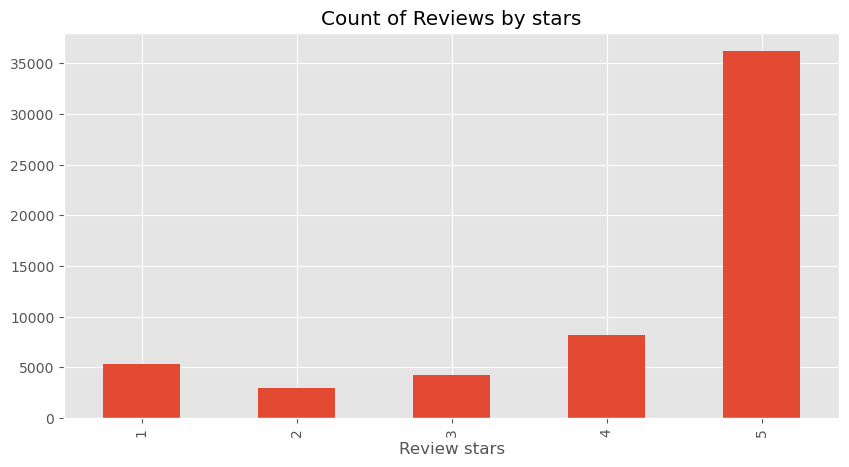

In [70]:
ax =df2['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by stars', figsize=(10,5))
ax.set_xlabel('Review stars')
plt.show()

In [44]:
X = df2['Summary']
y = df2['sentiments']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=24)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [47]:
#Vectorizing the text data
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression
#Training the model
lr = LogisticRegression()
lr.fit(ctmTr, y_train)

C:\Users\GAMES\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
#Accuracy score
lr_score = lr.score(X_test_dtm, y_test)
print("Results for Logistic Regression with CountVectorizer")
print(lr_score)

Results for Logistic Regression with CountVectorizer
0.896551724137931


In [50]:
#Predicting the labels for test data
y_pred_lr = lr.predict(X_test_dtm)
from sklearn.metrics import confusion_matrix

In [51]:
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

In [52]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)

1922 2269 671 23558


In [53]:
#True positive and true negative rates
tpr_lr = round(tp/(tp + fn), 4)
tnr_lr = round(tn/(tn+fp), 4)

In [54]:
print(tpr_lr, tnr_lr)

0.9723 0.4586


## TFIDF VECTORIZER

In [55]:
# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [56]:
# logistic regression

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [59]:
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [60]:
lr = LogisticRegression()

In [61]:
lr.fit(X_train_vec, y_train)

LogisticRegression()

In [62]:
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression with tfidf")
print(lr_score)

Results for Logistic Regression with tfidf
0.8920126671358198


In [63]:
y_pred_lr = lr.predict(X_test_vec)

In [64]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_lr)

In [67]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp) # true positive, false positive, true negative, false negative, true negative rate, and false-negative rate.

1593 2598 471 23758


In [66]:
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)

0.9806 0.3801


# NLTK

In [72]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GAMES\AppData\Roaming\nltk_data...


True

In [75]:
# VADER Sentiment Scpring

In [73]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [76]:
sia.polarity_scores("I VERY happy!")

{'neg': 0.0, 'neu': 0.166, 'pos': 0.834, 'compound': 0.72}

In [77]:
sia.polarity_scores("This is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [78]:
# POLARITY SCORE ON THE ENTIRE DATA SET

In [83]:
res={}
for i,row in tqdm(df1.iterrows(), total=len(df1)):
    text =  row['Text']
    myid = row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/56840 [00:00<?, ?it/s]

In [84]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders= vaders.merge(df1,how='left')

In [87]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,302889,0.000,0.810,0.190,0.9274,B004BY7HKC,A2CQIWHK4CKTGZ,C. Stowe,0,0,5,1328400000,Great gluten free snack,Out of all of the gluten free snacks I have tr...
1,38511,0.095,0.720,0.186,0.7534,B000H26J7E,A36WA7L88C2NW1,"Candace Drimmer ""a.k.a. Candi Boggs""",2,6,5,1297728000,"Affordable, delightful and good value for the ...",As a chocolate lover--who use to make pilgrima...
2,29131,0.028,0.847,0.125,0.7807,B000FFVYFA,A2G6O9IQ6Y64AD,Just me,5,5,5,1236902400,Small slice of heaven,Wow.<br />For those on a gluten & dairy-free d...
3,110704,0.037,0.887,0.076,0.7039,B00438XVGU,A10FHIE6EYFOUG,"J. C. Hirsch ""nerd pie""",4,5,3,1309824000,Expiration dates - sometimes chewing gum stick...,I have some experience with expired Via coffee...
4,64331,0.075,0.704,0.221,0.9289,B001EO5YAC,A19JPROF2J4PA4,Acheron's Flow,0,0,5,1265500800,My favorite online coffee,Very nice roast. An aroma to die for. This is ...


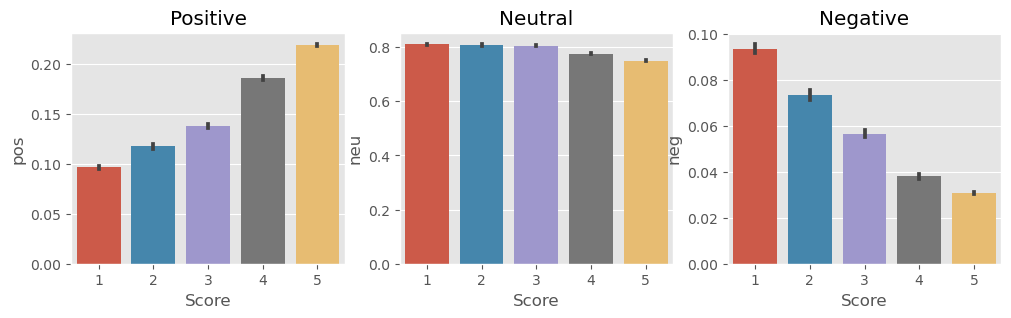

In [88]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [103]:
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GAMES\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

df1['clean_text'] = df1.Text.apply(clean_text)

In [110]:
df1 = df1[['Score', 'clean_text']]

In [111]:
df1

,Score,clean_text
302888,5,gluten free snacks tried think ones best nice ...
38510,5,chocolate lover use make pilgrimages sprungli ...
29130,5,wow br gluten dairy free diet ideal quick snac...
110703,3,experience expired via coffee occasionally oft...
64330,5,nice roast aroma die best tasting whole bean b...
...,...,...
22858,1,delivery time opened product like shelf life e...
125239,5,great product high quality lower price similar...
363907,2,researching brands vanilla bean paste decided ...
303801,5,second time purchasing bags tazo awake tea pri...


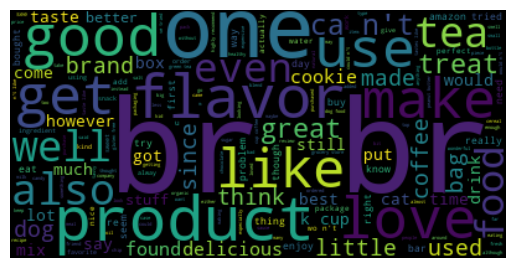

In [109]:
stopwords = set('STOPWORDS')
textt = " ".join(review for review in df1.clean_text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()